# Single Scatter in HR

In [1]:
%matplotlib inline

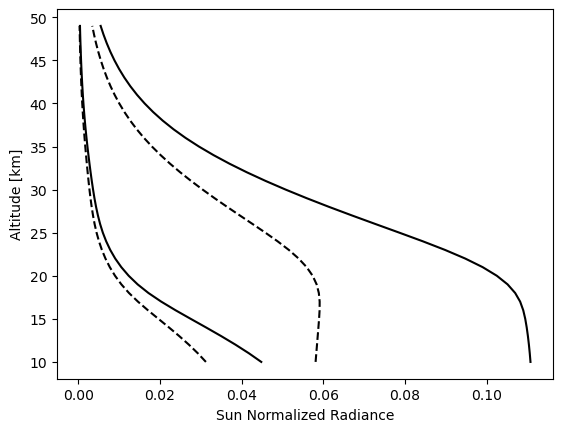

In [2]:
import sasktran as sk
import matplotlib.pyplot as plt
import numpy as np
from sasktran.geometry import VerticalImage

tanalts_km = np.arange(10, 50, 1)

# First recreate our geometry and atmosphere classes
geometry = VerticalImage()
geometry.from_sza_saa(sza=60, saa=60, lat=0, lon=0, tanalts_km=tanalts_km, mjd=54372, locallook=0,
                      satalt_km=600, refalt_km=20)

atmosphere = sk.Atmosphere()

atmosphere['ozone'] = sk.Species(sk.O3OSIRISRes(), sk.Labow())
atmosphere['air'] = sk.Species(sk.Rayleigh(), sk.MSIS90())

# And now make the engine
engine = sk.EngineHR(geometry=geometry, atmosphere=atmosphere)

# Choose some wavelengths to do the calculation at
engine.wavelengths = [340, 600]

# And do the calculation
radiance = engine.calculate_radiance()

engine.num_orders_of_scatter = 1

radiance_ss = engine.calculate_radiance()

plt.plot(radiance.T, tanalts_km, color='k')
plt.xlabel('Sun Normalized Radiance')
plt.ylabel('Altitude [km]')

plt.plot(radiance_ss.T, tanalts_km, color='k', linestyle='--')

plt.show()